How can we accurately classify different species of flowers based on their physical characteristics (like petal and sepal length/width)

This is a classification problem often tied to biological taxonomy or agriculture.

Could be useful in:

Automating flower species identification for botanists or gardeners.

Enhancing plant recognition in mobile applications.

Supporting biodiversity studies with machine learning.

# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor

# Load and review data

In [2]:
df = pd.read_csv('iris.csv')

# Check first 5 rows of dataset

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# It tells the data type of the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

# There are no null values

In [37]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

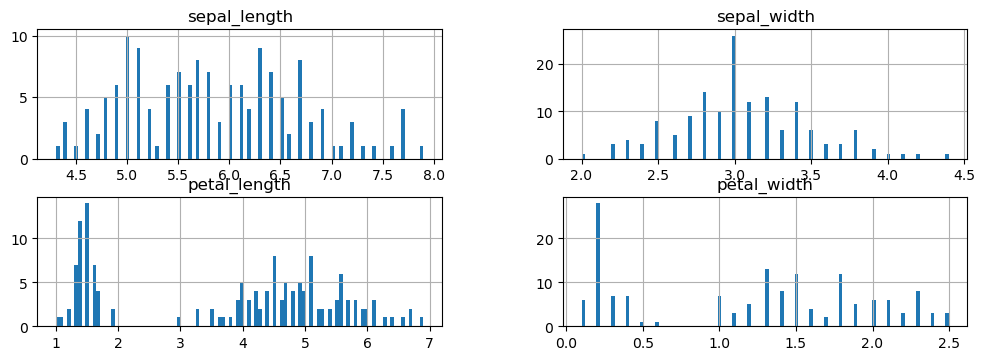

In [10]:
# Excluding outcome columns which has only
columns = list(df)[0:-1]
df[columns].hist(stacked=False, bins=100, figsize = (12,30), layout=(14,2));
# Histogram of first 4 columns

# Observation
1. Petal length and Petal width show clearer class separability due to their bimodal distribution.
2. Sepal length and Sepal width are more evenly distributed with less clear separation between classes.
3. These visualizations support the use of petal measurements as more informattive features for classification. 

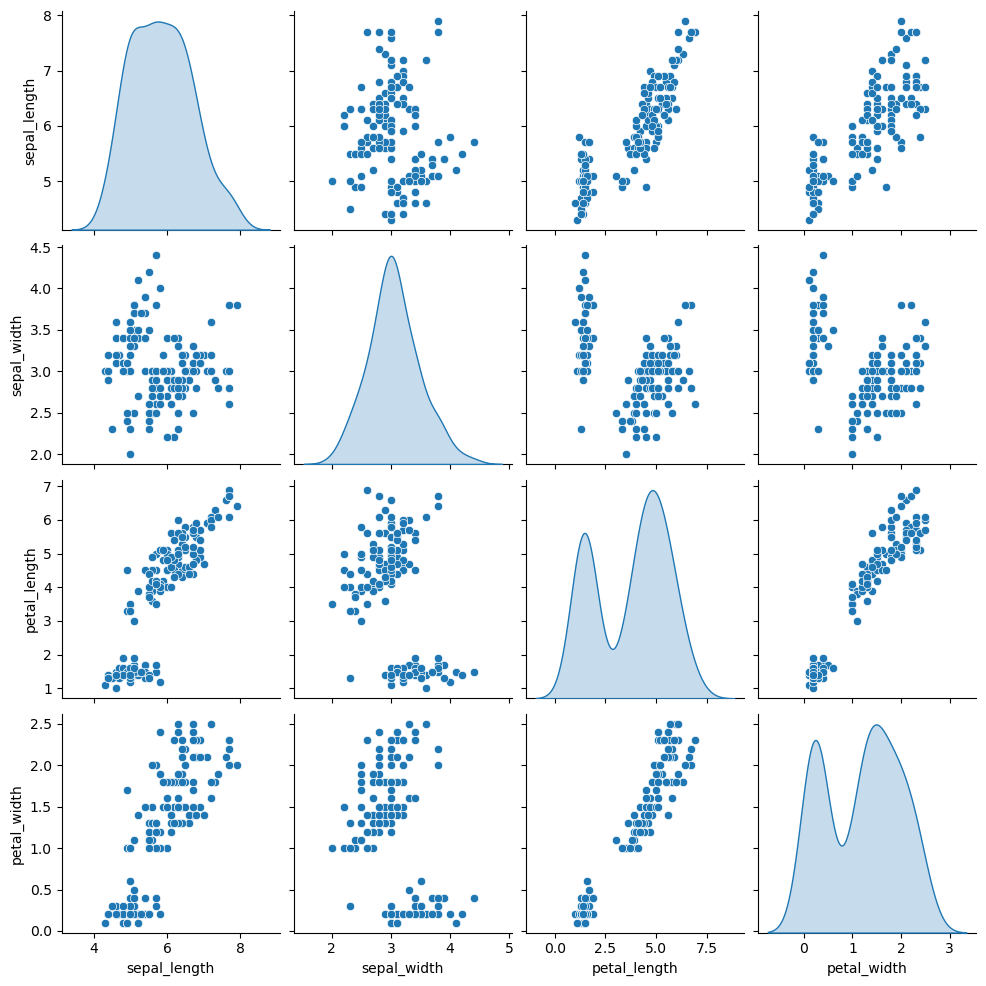

In [34]:
sns.pairplot(df,diag_kind='kde')

Diagonal KDE plots: 1.The diagonal plots show Kernel Density Estimates for each feature.

2. These plots help understand the distribution of eachvariable (sepal length, sepal width, petal length petal width).

3. Petal length and petal width show bimodal distributions, suggesting clear separation between speciess

Scatter plots: These show the relationships between pairs of features.

# Data Preprocessing 

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values

# We will divide the data into train and test split.

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

# Data Scaling

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the model with the help of KNeighborsClassifier class of sklearn

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

# We need to make prediction

In [19]:
y_pred = classifier.predict(X_test)

# Print the results

In [22]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy: 0.9736842105263158


# KNN as Regressor

In [28]:
array = df.values
X = array[:,:2]
y = array[:,2]

In [30]:
df.shape

(150, 5)

In [32]:
knn =  KNeighborsRegressor(n_neighbors=10)
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=10)

In [33]:
print("The MSE is:", format(np.power(y-knn.predict(X),2).mean()))

The MSE is: 0.1706753333333333
